# Exercício 1 - Ligações para o 911

### Nos EUA, o número 911 é destinado à emergências. O [Kaggle](https://www.kaggle.com/mchirico/montcoalert) disponibilizou dados de ligações para o serviço:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)



### Leia o arquivo csv (911.csv) como um dataframe chamado _calls_

In [38]:
import pandas as pd
import matplotlib as plt

In [2]:
calls = pd.read_csv('911.csv')
calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


### Quantas linhas e colunas tem o arquivo? Qual a quantidade de memória necessária para carregá-lo?

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Quais são os top 5 CEPs nas chamadas 911?

In [18]:
calls['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Quais são os 5 principais municípios nas chamadas 911?

In [21]:
calls.twp.value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Quantos códigos de título únicos existem?

In [23]:
calls['title'].nunique()

110

### Na coluna _title_ existem Razões / Departamentos especificados antes do código do título. Estes são _"EMS", "Fire"  e  "Traffic"_. Crie uma nova coluna chamada _Reason_ que conterá esse valor em cada linha

#### Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason será EMS.

In [25]:
calls.title.str.split(':')

0             [EMS,  BACK PAINS/INJURY]
1            [EMS,  DIABETIC EMERGENCY]
2                [Fire,  GAS-ODOR/LEAK]
3             [EMS,  CARDIAC EMERGENCY]
4                     [EMS,  DIZZINESS]
                      ...              
99487    [Traffic,  VEHICLE ACCIDENT -]
99488    [Traffic,  VEHICLE ACCIDENT -]
99489               [EMS,  FALL VICTIM]
99490           [EMS,  NAUSEA/VOMITING]
99491    [Traffic,  VEHICLE ACCIDENT -]
Name: title, Length: 99492, dtype: object

In [26]:
calls.title.apply(lambda title: title.split(':')[0])

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [28]:
calls['Reason'] = calls.title.apply(lambda title: title.split(':')[0])
calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS: BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS: DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire: GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS: CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS: DIZZINESS,EMS
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic: VEHICLE ACCIDENT -,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic: VEHICLE ACCIDENT -,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS: FALL VICTIM,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS: NAUSEA/VOMITING,EMS


In [29]:
calls.Reason.unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [30]:
calls.Reason.nunique()

3

### Qual é a razão mais comum para uma chamada do 911 com base nessa nova coluna?

In [31]:
calls.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:ylabel='Reason'>

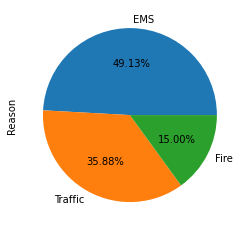

In [35]:
calls.Reason.value_counts().plot(kind='pie', autopct='%.2f%%')

### Qual é o tipo de dados dos objetos na coluna *timeStamp*?

In [36]:
type(calls['timeStamp'][0])

str

### Converta a coluna _timeStamp_ para DateTime

In [40]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [41]:
type(calls['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Crie 3 novas colunas chamadas _Hour, Month e Day of Week_. Você criará essas colunas com base na coluna timeStamp

In [43]:
calls['Hour'] = calls['timeStamp'].apply(lambda time: time.hour)
calls['Month'] = calls['timeStamp'].apply(lambda time: time.month)
calls['Day of Week'] = calls['timeStamp'].apply(lambda time: time.dayofweek)
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS: BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS: DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire: GAS-ODOR/LEAK,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS: CARDIAC EMERGENCY,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS: DIZZINESS,EMS,17,12,3


### Observe como o dia da demana é um número inteiro de 0-6. Mapeie os nomes das seqüências reais para o dia da semana, nessa mesma coluna:

- 0 => Mon
- 1 => Tue
- 2 => Wed
- 3 => Thu
- 4 => Fri
- 5 => Sat
- 6 => Sun

In [44]:
calls['Day of Week'].replace([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

In [48]:
calls['Day of Week'] = calls['Day of Week'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS: BACK PAINS/INJURY,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS: DIABETIC EMERGENCY,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire: GAS-ODOR/LEAK,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS: CARDIAC EMERGENCY,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS: DIZZINESS,EMS,17,12,Thu


### Qual a quantidade de chamadas de cada motivo (*Reason*) por mês?

In [52]:
gb = calls.groupby(['Month', 'Reason'])
df = gb.size()
df.index

MultiIndex([( 1,     'EMS'),
            ( 1,    'Fire'),
            ( 1, 'Traffic'),
            ( 2,     'EMS'),
            ( 2,    'Fire'),
            ( 2, 'Traffic'),
            ( 3,     'EMS'),
            ( 3,    'Fire'),
            ( 3, 'Traffic'),
            ( 4,     'EMS'),
            ( 4,    'Fire'),
            ( 4, 'Traffic'),
            ( 5,     'EMS'),
            ( 5,    'Fire'),
            ( 5, 'Traffic'),
            ( 6,     'EMS'),
            ( 6,    'Fire'),
            ( 6, 'Traffic'),
            ( 7,     'EMS'),
            ( 7,    'Fire'),
            ( 7, 'Traffic'),
            ( 8,     'EMS'),
            ( 8,    'Fire'),
            ( 8, 'Traffic'),
            (12,     'EMS'),
            (12,    'Fire'),
            (12, 'Traffic')],
           names=['Month', 'Reason'])

In [53]:
df

Month  Reason 
1      EMS        6063
       Fire       1905
       Traffic    5237
2      EMS        5413
       Fire       1869
       Traffic    4185
3      EMS        5832
       Fire       1590
       Traffic    3679
4      EMS        5680
       Fire       1717
       Traffic    3929
5      EMS        5734
       Fire       1573
       Traffic    4116
6      EMS        5720
       Fire       1796
       Traffic    4270
7      EMS        6029
       Fire       1901
       Traffic    4207
8      EMS        4508
       Fire       1473
       Traffic    3097
12     EMS        3898
       Fire       1096
       Traffic    2975
dtype: int64

In [54]:
df.unstack()

Reason,EMS,Fire,Traffic
Month,,,
1,6063,1905,5237
2,5413,1869,4185
3,5832,1590,3679
4,5680,1717,3929
5,5734,1573,4116
6,5720,1796,4270
7,6029,1901,4207
8,4508,1473,3097
12,3898,1096,2975


In [56]:
df.unstack(level=0)

Month,1,2,3,4,5,6,7,8,12
Reason,,,,,,,,,
EMS,6063,5413,5832,5680,5734,5720,6029,4508,3898
Fire,1905,1869,1590,1717,1573,1796,1901,1473,1096
Traffic,5237,4185,3679,3929,4116,4270,4207,3097,2975


<AxesSubplot:xlabel='Month'>

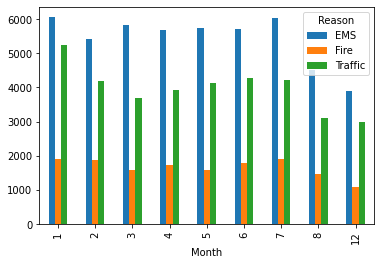

In [57]:
df.unstack(level=1).plot(kind='bar')

### Qual foi o dia com a maior quantidade de chamadas? Quantas chamadas foram executadas neste dia?

In [62]:
calls.timeStamp.dt.date.value_counts().head(1)

2016-01-23    913
Name: timeStamp, dtype: int64

### Levando-se em consideração apenas atendimentos feitos às sextas-feiras, qual a hora do dia com o maior número de chamadas?

In [64]:
f = calls.groupby(['Day of Week', 'Hour']).size()
f

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Length: 168, dtype: int64

In [65]:
f.xs(key='Fri', level = 0)

Hour
0      275
1      235
2      191
3      175
4      201
5      194
6      372
7      598
8      742
9      752
10     803
11     859
12     885
13     890
14     932
15     980
16    1039
17     980
18     820
19     696
20     667
21     559
22     514
23     474
dtype: int64

<AxesSubplot:xlabel='Hour'>

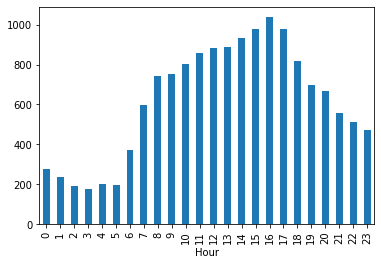

In [66]:
f.xs(key='Fri', level=0).plot(kind='bar')

In [68]:
f.xs(key='Fri', level=0).idxmax()

16

### Levando-se em consideração os atendimentos relacionados a incêndio (*Reason* = *Fire*) qual a quantidade de chamados aos sábados?

In [73]:
s = calls.groupby(['Reason', 'Day of Week']).size()
s

Reason   Day of Week
EMS      Fri            7315
         Mon            7240
         Sat            6685
         Sun            6456
         Thu            6993
         Tue            7222
         Wed            6966
Fire     Fri            2088
         Mon            2204
         Sat            2068
         Sun            2076
         Thu            2136
         Tue            2121
         Wed            2227
Traffic  Fri            5430
         Mon            5236
         Sat            4583
         Sun            3604
         Thu            5349
         Tue            5807
         Wed            5686
dtype: int64

In [75]:
s['Fire']['Sat']


2068